# 🏦 Loan Repayment Prediction - Complete ML Pipeline

**Goal:** Predict the probability that a borrower will pay back their loan

**Evaluation Metric:** Area Under the ROC Curve (AUC-ROC)

This notebook walks through the complete Machine Learning Development Lifecycle:
1. 📊 Data Exploration
2. 🧹 Data Cleaning
3. 🔧 Feature Engineering
4. 🤖 Model Selection
5. 🎯 Model Training
6. ⚙️ Hyperparameter Tuning
7. 📈 Model Evaluation

## 📦 Import Libraries

Let's start by importing all necessary libraries for our analysis and modeling.

In [41]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('seaborn-v0_8-darkgrid')

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


## 📥 Load Data

Let's load our training, test, and sample submission files.


In [42]:
# Load datasets
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")

print(f"📊 Training set shape: {train.shape}")
print(f"📊 Test set shape: {test.shape}")
print(f"📊 Sample submission shape: {sample_submission.shape}")
print(f"\n✅ Data loaded successfully!")


📊 Training set shape: (593994, 13)
📊 Test set shape: (254569, 12)
📊 Sample submission shape: (254569, 2)

✅ Data loaded successfully!


---

## 1️⃣ Data Exploration

Understanding our data is the foundation of any successful ML project. Let's dive deep into the dataset!


In [43]:
# First look at the data
print("=" * 60)
print("📋 DATASET OVERVIEW")
print("=" * 60)
print(f"\nTraining set shape: {train.shape}")
print(f"Test set shape: {test.shape}")
print(f"\nColumn names:")
print(train.columns.tolist())
print(f"\nFirst few rows:")
train.head()


📋 DATASET OVERVIEW

Training set shape: (593994, 13)
Test set shape: (254569, 12)

Column names:
['id', 'annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate', 'gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade', 'loan_paid_back']

First few rows:


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [44]:
# Data types and basic info
print("=" * 60)
print("📊 DATA TYPES & INFO")
print("=" * 60)
train.info()


📊 DATA TYPES & INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [45]:
# Statistical summary
print("=" * 60)
print("📈 STATISTICAL SUMMARY")
print("=" * 60)
train.describe()


📈 STATISTICAL SUMMARY


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [46]:
# Check for missing values
print("=" * 60)
print("🔍 MISSING VALUES ANALYSIS")
print("=" * 60)
missing_train = train.isnull().sum()
missing_test = test.isnull().sum()

missing_df = pd.DataFrame({
    'Train Missing': missing_train,
    'Test Missing': missing_test,
    'Train %': (missing_train / len(train) * 100).round(2),
    'Test %': (missing_test / len(test) * 100).round(2)
})

print(missing_df[missing_df['Train Missing'] > 0])
if missing_df[missing_df['Train Missing'] > 0].empty:
    print("\n✅ No missing values found in the dataset!")


🔍 MISSING VALUES ANALYSIS
Empty DataFrame
Columns: [Train Missing, Test Missing, Train %, Test %]
Index: []

✅ No missing values found in the dataset!


🎯 TARGET VARIABLE DISTRIBUTION
                 Count  Percentage
loan_paid_back                    
1.0             474494       79.88
0.0             119500       20.12


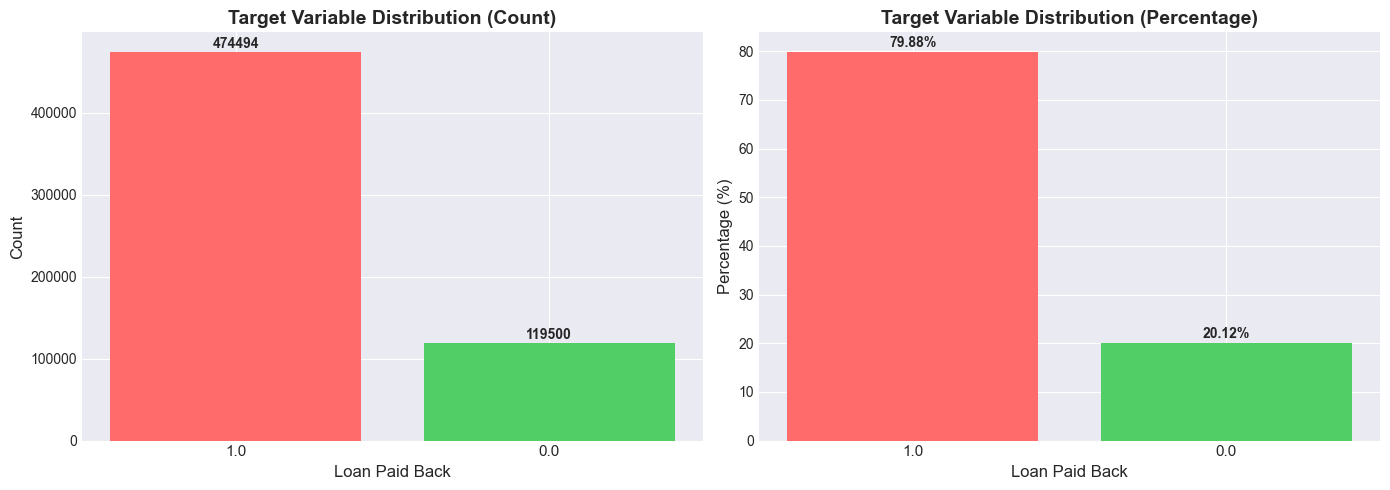


📊 Class balance ratio: 0.25:1


In [47]:
# Target variable distribution
print("=" * 60)
print("🎯 TARGET VARIABLE DISTRIBUTION")
print("=" * 60)
target_dist = train['loan_paid_back'].value_counts()
target_percent = train['loan_paid_back'].value_counts(normalize=True) * 100

target_df = pd.DataFrame({
    'Count': target_dist,
    'Percentage': target_percent.round(2)
})
print(target_df)

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(target_df.index.astype(str), target_df['Count'], color=['#ff6b6b', '#51cf66'])
axes[0].set_title('Target Variable Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Loan Paid Back', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', labelsize=11)
for i, v in enumerate(target_df['Count']):
    axes[0].text(i, v + 5000, str(v), ha='center', fontweight='bold')

# Percentage plot
axes[1].bar(target_df.index.astype(str), target_df['Percentage'], color=['#ff6b6b', '#51cf66'])
axes[1].set_title('Target Variable Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Loan Paid Back', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].tick_params(axis='x', labelsize=11)
for i, v in enumerate(target_df['Percentage']):
    axes[1].text(i, v + 1, f'{v:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Class balance ratio: {target_dist[0] / target_dist[1]:.2f}:1")


📊 CATEGORICAL FEATURES ANALYSIS


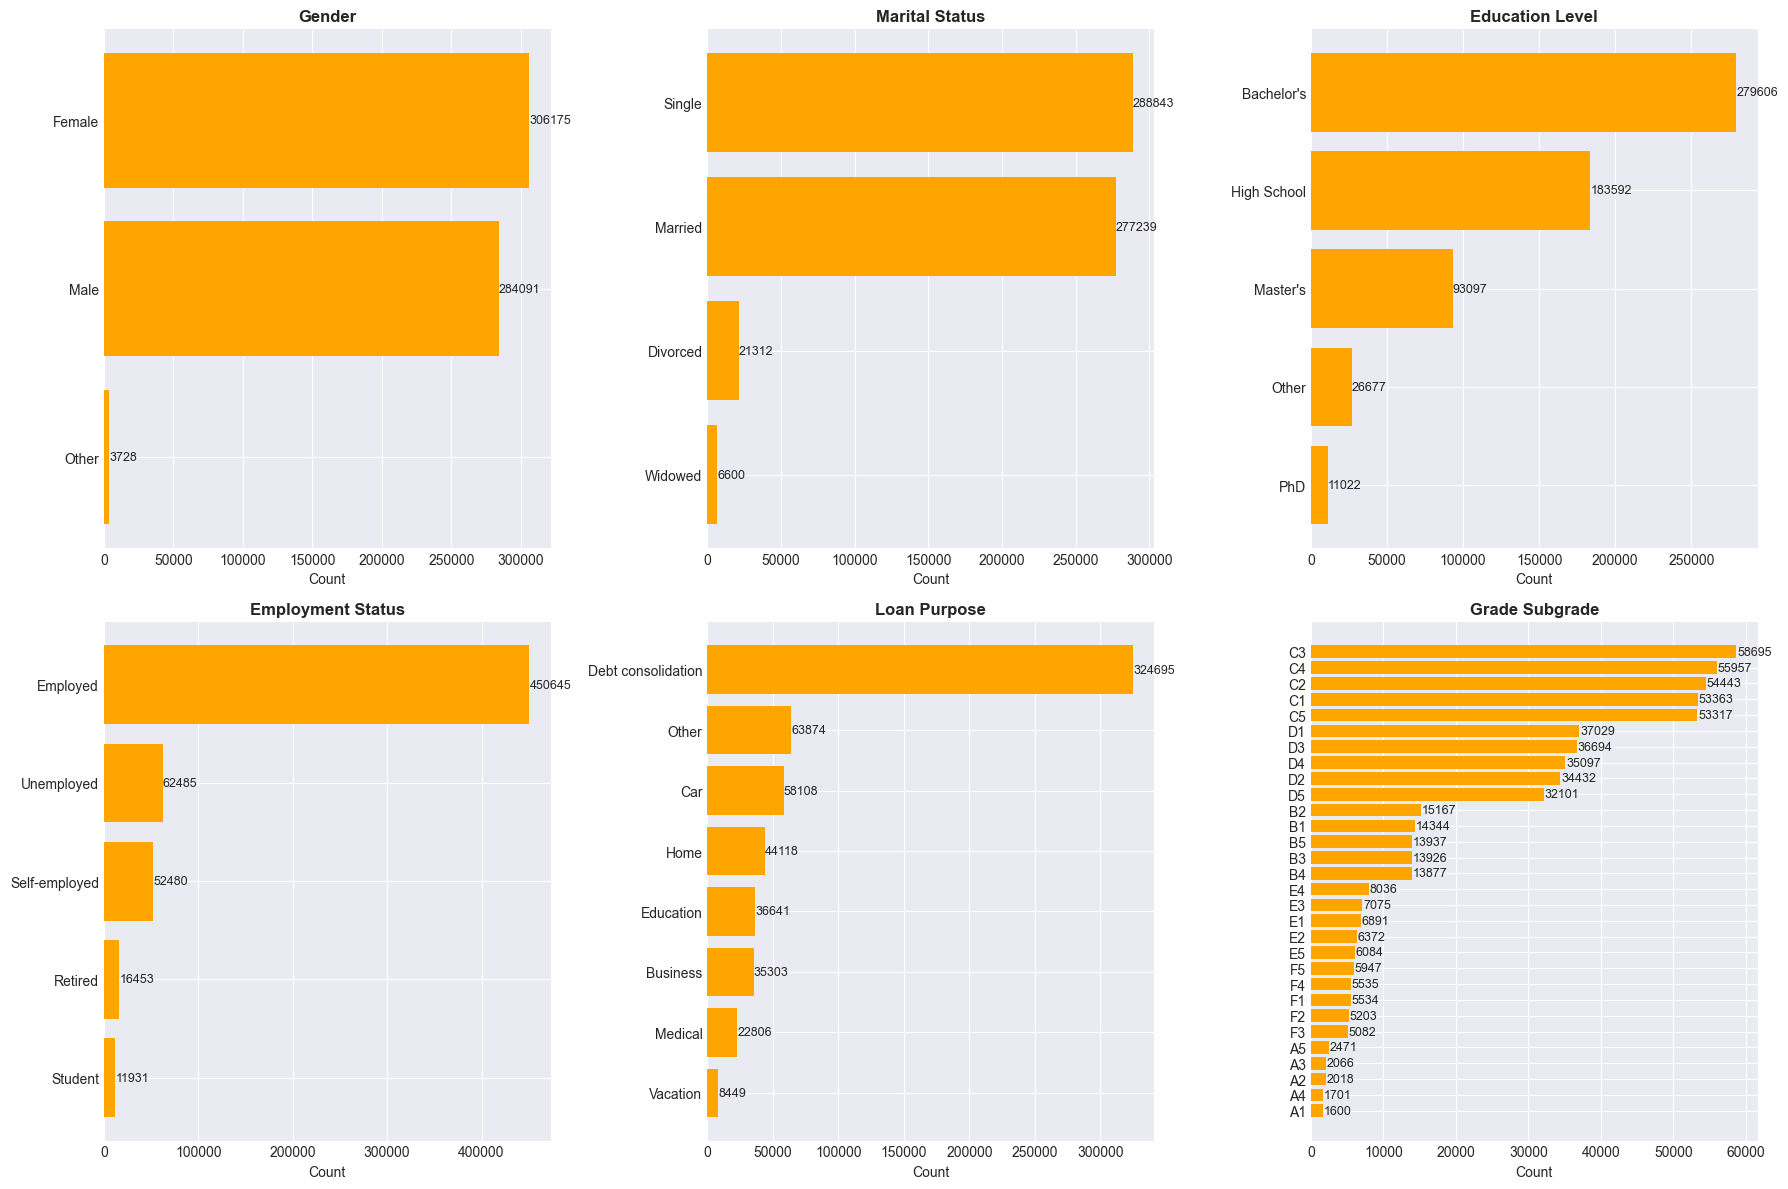


gender: 3 unique values
Values: ['Female' 'Male' 'Other']

marital_status: 4 unique values
Values: ['Single' 'Married' 'Divorced' 'Widowed']

education_level: 5 unique values
Values: ['High School' "Master's" "Bachelor's" 'PhD' 'Other']

employment_status: 5 unique values
Values: ['Self-employed' 'Employed' 'Unemployed' 'Retired' 'Student']

loan_purpose: 8 unique values
Values: ['Other' 'Debt consolidation' 'Home' 'Education' 'Vacation' 'Car'
 'Medical' 'Business']

grade_subgrade: 30 unique values
Values: ['C3' 'D3' 'C5' 'F1' 'D1' 'D5' 'C2' 'C1' 'F5' 'D4' 'C4' 'D2' 'E5' 'B1'
 'B2' 'F4' 'A4' 'E1' 'F2' 'B4' 'E4' 'B3' 'E3' 'B5' 'E2' 'F3' 'A5' 'A3'
 'A1' 'A2']


In [48]:
# Categorical features analysis
print("=" * 60)
print("📊 CATEGORICAL FEATURES ANALYSIS")
print("=" * 60)

categorical_cols = ['gender', 'marital_status', 'education_level', 'employment_status', 
                    'loan_purpose', 'grade_subgrade']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    value_counts = train[col].value_counts()
    axes[idx].barh(range(len(value_counts)), value_counts.values, color='orange')
    axes[idx].set_yticks(range(len(value_counts)))
    axes[idx].set_yticklabels(value_counts.index)
    axes[idx].set_title(f'{col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Count', fontsize=10)
    axes[idx].invert_yaxis()
    
    # Add value labels
    for i, v in enumerate(value_counts.values):
        axes[idx].text(v + 100, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print unique values for each categorical column
for col in categorical_cols:
    print(f"\n{col}: {train[col].nunique()} unique values")
    print(f"Values: {train[col].unique()}")


📈 NUMERICAL FEATURES DISTRIBUTION


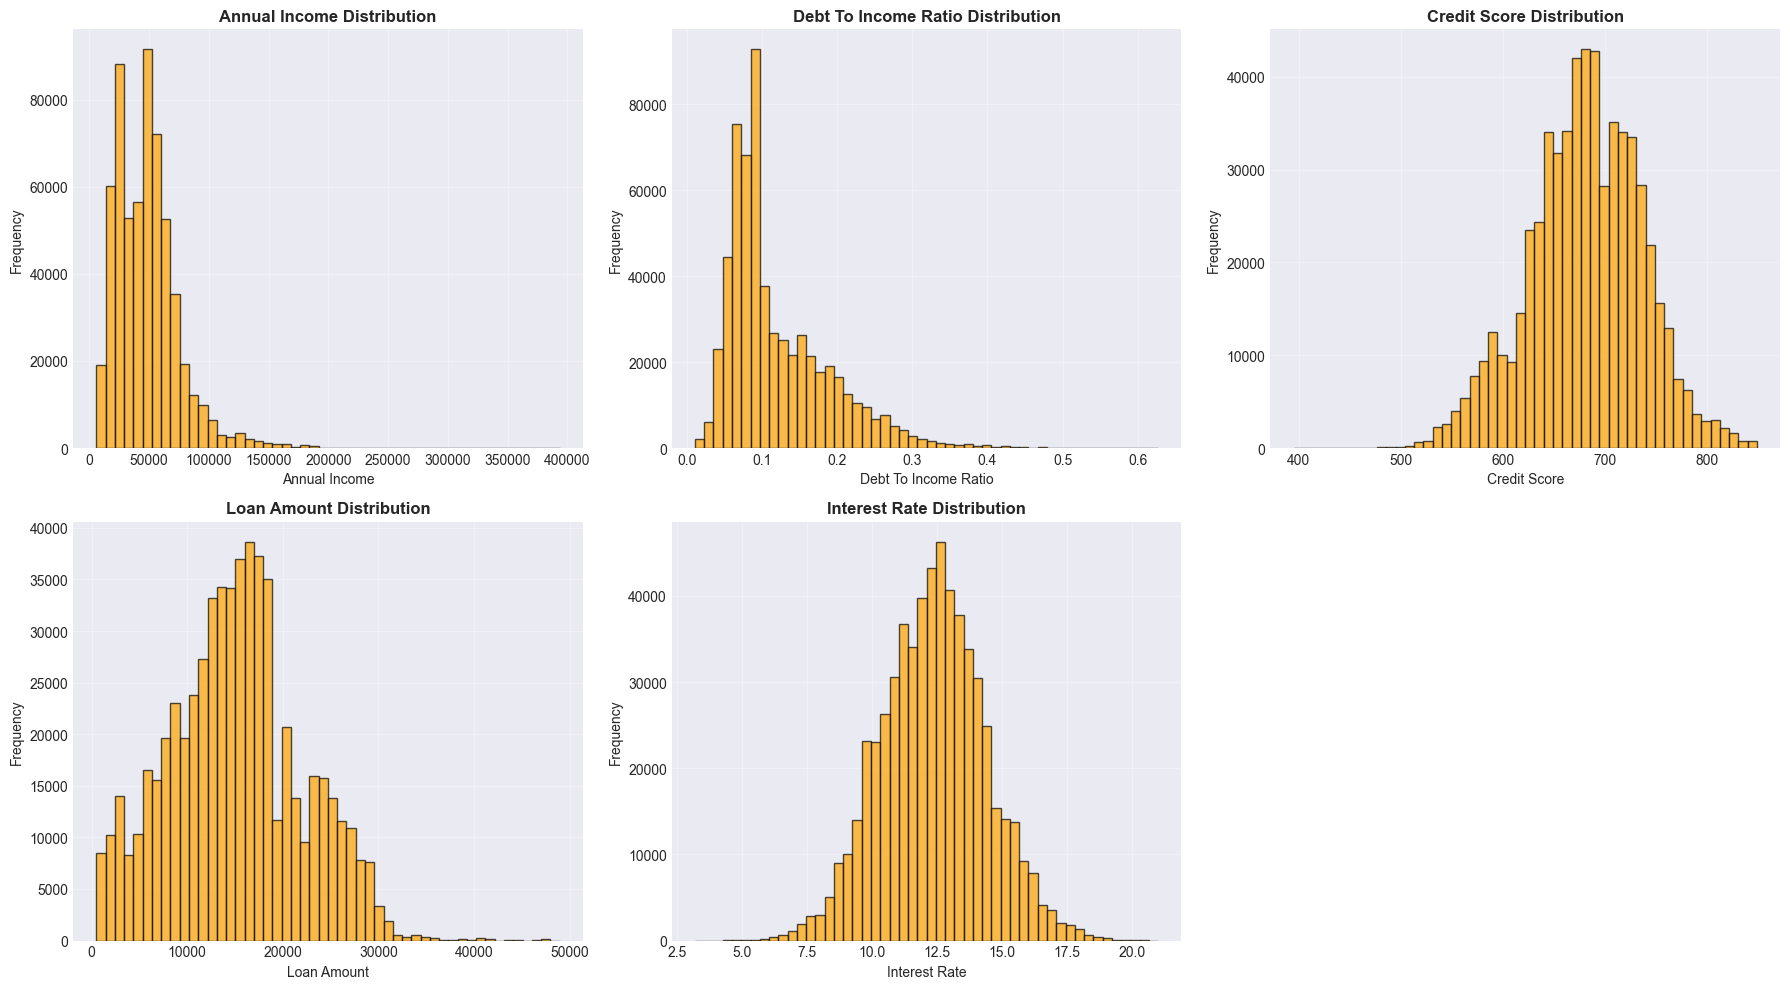

In [49]:
# Numerical features distribution
print("=" * 60)
print("📈 NUMERICAL FEATURES DISTRIBUTION")
print("=" * 60)

numerical_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score', 
                  'loan_amount', 'interest_rate']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(train[col], bins=50, color='orange', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col.replace("_", " ").title()} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col.replace('_', ' ').title(), fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(True, alpha=0.3)

# Remove empty subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()


🔗 CORRELATION MATRIX


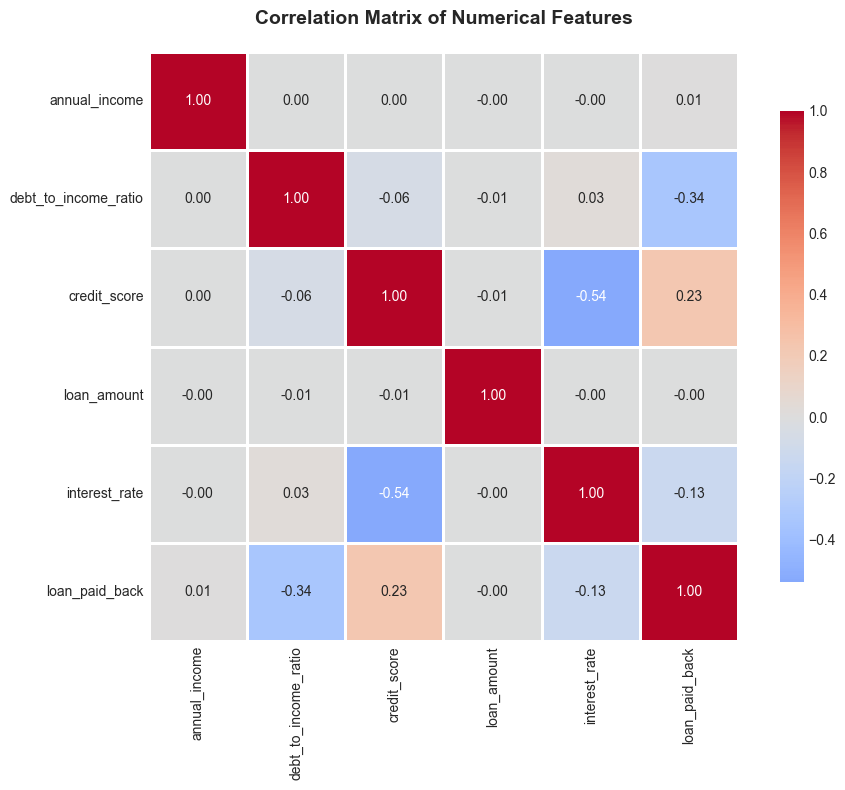


📊 Correlation with Target (loan_paid_back):
loan_paid_back          1.000000
credit_score            0.234560
annual_income           0.006326
loan_amount            -0.003762
interest_rate          -0.131184
debt_to_income_ratio   -0.335680
Name: loan_paid_back, dtype: float64


In [50]:
# Correlation analysis
print("=" * 60)
print("🔗 CORRELATION MATRIX")
print("=" * 60)

# Calculate correlation for numerical features
correlation_matrix = train[numerical_cols + ['loan_paid_back']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlation with target
print("\n📊 Correlation with Target (loan_paid_back):")
corr_with_target = correlation_matrix['loan_paid_back'].sort_values(ascending=False)
print(corr_with_target)


🎯 FEATURE VS TARGET ANALYSIS


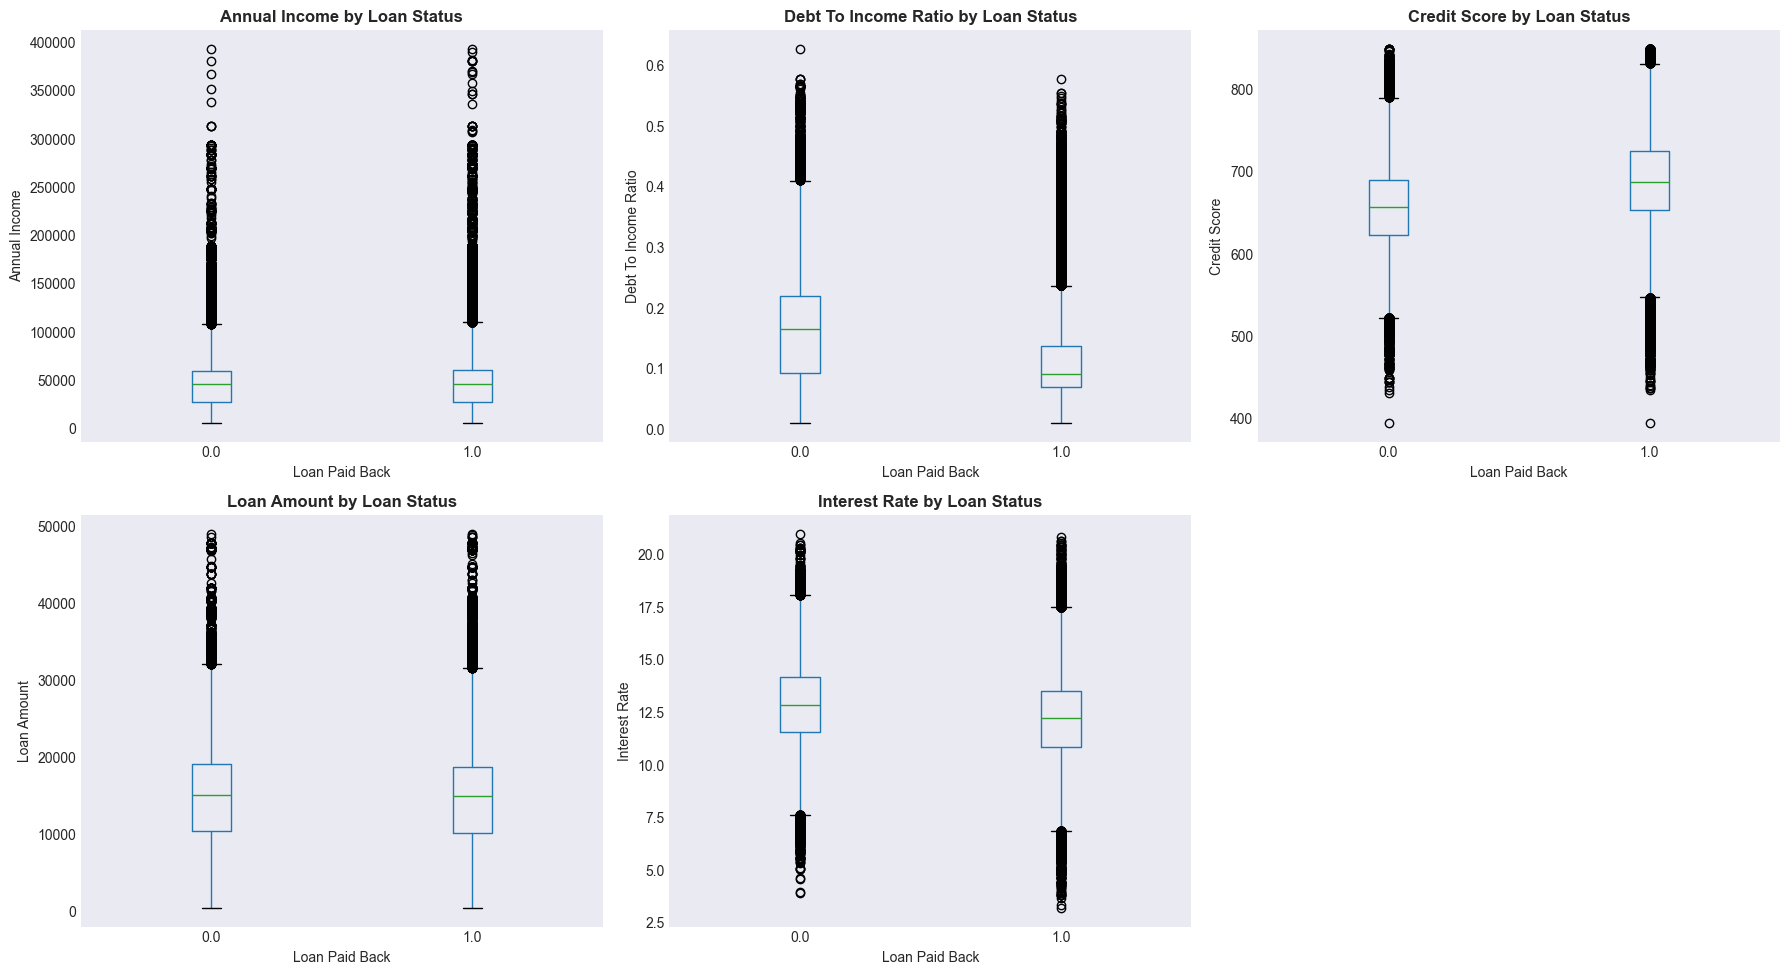

In [51]:
# Feature vs Target analysis
print("=" * 60)
print("🎯 FEATURE VS TARGET ANALYSIS")
print("=" * 60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    # Box plot
    train.boxplot(column=col, by='loan_paid_back', ax=axes[idx], grid=False)
    axes[idx].set_title(f'{col.replace("_", " ").title()} by Loan Status', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Loan Paid Back', fontsize=10)
    axes[idx].set_ylabel(col.replace('_', ' ').title(), fontsize=10)
    axes[idx].get_figure().suptitle('')  # Remove default title

axes[5].axis('off')
plt.tight_layout()
plt.show()


---

## 2️⃣ Data Cleaning

Let's clean and prepare our data for modeling. This includes handling missing values, outliers, and data inconsistencies.


In [52]:
# Create copies for cleaning
train_clean = train.copy()
test_clean = test.copy()

print("📋 Original shapes:")
print(f"Train: {train_clean.shape}")
print(f"Test: {test_clean.shape}")


📋 Original shapes:
Train: (593994, 13)
Test: (254569, 12)


In [53]:
# Check for duplicates
print("=" * 60)
print("🔍 DUPLICATE CHECK")
print("=" * 60)
train_duplicates = train_clean.duplicated().sum()
test_duplicates = test_clean.duplicated().sum()

print(f"Train duplicates: {train_duplicates}")
print(f"Test duplicates: {test_duplicates}")

if train_duplicates > 0:
    train_clean = train_clean.drop_duplicates()
    print(f"✅ Removed {train_duplicates} duplicates from training set")
else:
    print("✅ No duplicates found in training set")

if test_duplicates > 0:
    test_clean = test_clean.drop_duplicates()
    print(f"✅ Removed {test_duplicates} duplicates from test set")
else:
    print("✅ No duplicates found in test set")


🔍 DUPLICATE CHECK
Train duplicates: 0
Test duplicates: 0
✅ No duplicates found in training set
✅ No duplicates found in test set


📊 OUTLIER DETECTION
annual_income: 15917 outliers (2.68%)
debt_to_income_ratio: 17556 outliers (2.96%)
credit_score: 5901 outliers (0.99%)
loan_amount: 2902 outliers (0.49%)
interest_rate: 5136 outliers (0.86%)


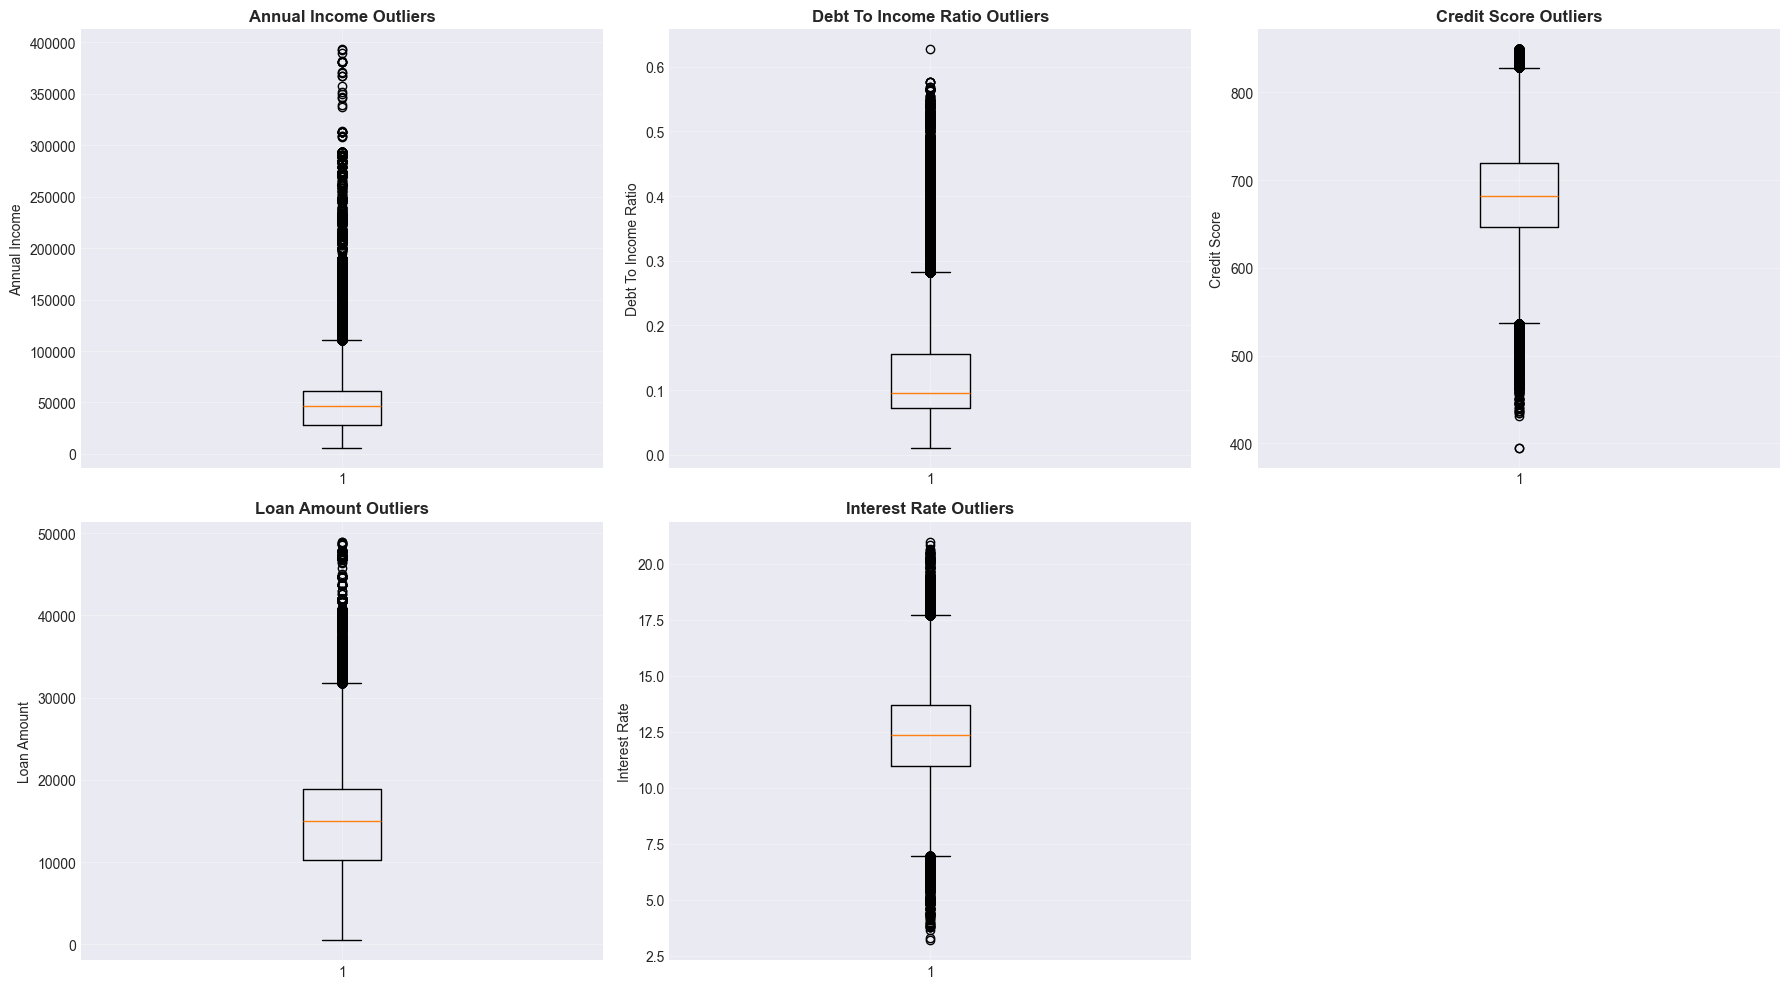


💡 Note: We'll handle outliers during feature engineering if needed.


In [54]:
# Outlier detection using IQR method
print("=" * 60)
print("📊 OUTLIER DETECTION")
print("=" * 60)

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_summary = {}
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(train_clean, col)
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(train_clean) * 100),
        'lower_bound': lower,
        'upper_bound': upper
    }
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(train_clean)*100:.2f}%)")

# Visualize outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(train_clean[col], vert=True)
    axes[idx].set_title(f'{col.replace("_", " ").title()} Outliers', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col.replace('_', ' ').title(), fontsize=10)
    axes[idx].grid(True, alpha=0.3)

axes[5].axis('off')
plt.tight_layout()
plt.show()

print("\n💡 Note: We'll handle outliers during feature engineering if needed.")


In [55]:
# Check for inconsistent data
print("=" * 60)
print("🔍 DATA CONSISTENCY CHECK")
print("=" * 60)

# Check for negative values in positive-only columns
print("Negative values check:")
for col in ['annual_income', 'credit_score', 'loan_amount', 'interest_rate', 'debt_to_income_ratio']:
    negative_count = (train_clean[col] < 0).sum()
    if negative_count > 0:
        print(f"  ⚠️  {col}: {negative_count} negative values")
    else:
        print(f"  ✅ {col}: No negative values")

# Check for impossible values
print("\nImpossible values check:")
if (train_clean['debt_to_income_ratio'] > 1).any():
    print(f"  ⚠️  debt_to_income_ratio: Some values > 1")
else:
    print(f"  ✅ debt_to_income_ratio: All values <= 1")

if (train_clean['credit_score'] > 850).any() or (train_clean['credit_score'] < 300).any():
    print(f"  ⚠️  credit_score: Some values outside typical range (300-850)")
else:
    print(f"  ✅ credit_score: All values in typical range")

print("\n✅ Data consistency check completed!")


🔍 DATA CONSISTENCY CHECK
Negative values check:
  ✅ annual_income: No negative values
  ✅ credit_score: No negative values
  ✅ loan_amount: No negative values
  ✅ interest_rate: No negative values
  ✅ debt_to_income_ratio: No negative values

Impossible values check:
  ✅ debt_to_income_ratio: All values <= 1
  ✅ credit_score: All values in typical range

✅ Data consistency check completed!


---

## 3️⃣ Feature Engineering

Feature engineering is where we create new features and transform existing ones to improve model performance. This is often the most impactful step in ML!


In [56]:
# Separate features and target
X_train = train_clean.drop(['id', 'loan_paid_back'], axis=1)
y_train = train_clean['loan_paid_back']
X_test = test_clean.drop('id', axis=1)

print(f"Training features shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test features shape: {X_test.shape}")


Training features shape: (593994, 11)
Training target shape: (593994,)
Test features shape: (254569, 11)


In [57]:
# Create new features
print("=" * 60)
print("🔧 CREATING NEW FEATURES")
print("=" * 60)

def create_features(df):
    """Create new features from existing ones"""
    df = df.copy()
    
    # Income to loan ratio (handle division by zero and NaN)
    df['income_to_loan_ratio'] = df['annual_income'] / (df['loan_amount'] + 1)
    df['income_to_loan_ratio'] = df['income_to_loan_ratio'].replace([np.inf, -np.inf], 0).fillna(0)
    
    # Monthly payment estimate (simplified)
    df['monthly_payment_estimate'] = df['loan_amount'] * (df['interest_rate'] / 100 / 12)
    df['monthly_payment_estimate'] = df['monthly_payment_estimate'].fillna(0)
    
    # Payment to income ratio (handle division by zero and NaN)
    df['payment_to_income_ratio'] = df['monthly_payment_estimate'] / (df['annual_income'] / 12 + 1)
    df['payment_to_income_ratio'] = df['payment_to_income_ratio'].replace([np.inf, -np.inf], 0).fillna(0)
    
    # Credit score categories (handle edge cases)
    df['credit_score_category'] = pd.cut(
        df['credit_score'], 
        bins=[0, 580, 670, 740, 850, float('inf')], 
        labels=['Poor', 'Fair', 'Good', 'Excellent', 'Excellent'],
        include_lowest=True
    )
    # Fill any remaining NaN with 'Fair' (middle category)
    df['credit_score_category'] = df['credit_score_category'].fillna('Fair')
    
    # Interest rate categories (handle edge cases)
    df['interest_rate_category'] = pd.cut(
        df['interest_rate'],
        bins=[0, 10, 13, 16, 100, float('inf')],
        labels=['Low', 'Medium', 'High', 'Very High', 'Very High'],
        include_lowest=True
    )
    # Fill any remaining NaN with 'Medium' (middle category)
    df['interest_rate_category'] = df['interest_rate_category'].fillna('Medium')
    
    # Loan amount categories (handle edge cases)
    df['loan_amount_category'] = pd.cut(
        df['loan_amount'],
        bins=[0, 5000, 15000, 30000, float('inf')],
        labels=['Small', 'Medium', 'Large', 'Very Large'],
        include_lowest=True
    )
    # Fill any remaining NaN with 'Medium' (middle category)
    df['loan_amount_category'] = df['loan_amount_category'].fillna('Medium')
    
    # Debt to income risk level (handle edge cases)
    df['dti_risk_level'] = pd.cut(
        df['debt_to_income_ratio'],
        bins=[0, 0.2, 0.4, 0.6, 1.0, float('inf')],
        labels=['Low', 'Medium', 'High', 'Very High', 'Very High'],
        include_lowest=True
    )
    # Fill any remaining NaN with 'Medium' (middle category)
    df['dti_risk_level'] = df['dti_risk_level'].fillna('Medium')
    
    # Extract grade and subgrade from grade_subgrade
    df['grade'] = df['grade_subgrade'].str[0]
    # Extract subgrade number safely - convert string slice to numeric
    df['subgrade'] = pd.to_numeric(df['grade_subgrade'].str[1:], errors='coerce').fillna(0).astype(int)
    # Drop original grade_subgrade column since we've extracted the useful information
    if 'grade_subgrade' in df.columns:
        df = df.drop('grade_subgrade', axis=1)
    
    # Employment risk (Unemployed/Retired might be riskier)
    df['employment_risk'] = df['employment_status'].map({
        'Employed': 0,
        'Self-employed': 1,
        'Unemployed': 2,
        'Retired': 1
    })
    
    # Education level encoding (ordinal)
    education_order = {
        'High School': 1,
        "Bachelor's": 2,
        "Master's": 3,
        'PhD': 4,
        'Other': 0
    }
    df['education_encoded'] = df['education_level'].map(education_order)
    # Fill any missing values with 0 (Other)
    df['education_encoded'] = df['education_encoded'].fillna(0)
    
    # Employment risk - fill any missing values with 1 (Self-employed as default)
    df['employment_risk'] = df['employment_risk'].fillna(1)
    
    # Final check: replace any remaining NaN, inf, or -inf values in numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], 0).fillna(0)
    
    return df

# Apply feature engineering
X_train_fe = create_features(X_train)
X_test_fe = create_features(X_test)

print("✅ New features created:")
print(f"  - income_to_loan_ratio")
print(f"  - monthly_payment_estimate")
print(f"  - payment_to_income_ratio")
print(f"  - credit_score_category")
print(f"  - interest_rate_category")
print(f"  - loan_amount_category")
print(f"  - dti_risk_level")
print(f"  - grade, subgrade")
print(f"  - employment_risk")
print(f"  - education_encoded")

print(f"\nNew feature shape: {X_train_fe.shape}")


🔧 CREATING NEW FEATURES


ValueError: labels must be unique if ordered=True; pass ordered=False for duplicate labels

In [58]:
# Handle categorical variables
print("=" * 60)
print("🏷️  CATEGORICAL ENCODING")
print("=" * 60)

# Identify categorical columns (grade_subgrade already dropped, replaced by grade and subgrade)
categorical_features = ['gender', 'marital_status', 'education_level', 'employment_status', 
                       'loan_purpose', 'grade', 
                       'credit_score_category', 'interest_rate_category', 
                       'loan_amount_category', 'dti_risk_level']

# Use one-hot encoding for nominal variables
nominal_vars = ['gender', 'marital_status', 'education_level', 'employment_status', 
                'loan_purpose', 'grade', 'credit_score_category', 
                'interest_rate_category', 'loan_amount_category', 'dti_risk_level']

# Get all unique values from training set for consistent encoding
for col in nominal_vars:
    if col in X_train_fe.columns:
        train_values = set(X_train_fe[col].unique())
        test_values = set(X_test_fe[col].unique())
        if test_values - train_values:
            print(f"⚠️  {col}: Test set has values not in training: {test_values - train_values}")

# One-hot encode
X_train_encoded = pd.get_dummies(X_train_fe, columns=nominal_vars, prefix=nominal_vars, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_fe, columns=nominal_vars, prefix=nominal_vars, drop_first=True)

# Ensure test set has same columns as training set
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
extra_cols = set(X_test_encoded.columns) - set(X_train_encoded.columns)

for col in missing_cols:
    X_test_encoded[col] = 0

X_test_encoded = X_test_encoded[X_train_encoded.columns]

# Fill any NaN values that might have been created during encoding
X_train_encoded = X_train_encoded.fillna(0)
X_test_encoded = X_test_encoded.fillna(0)

print(f"✅ Encoding completed!")
print(f"Training shape after encoding: {X_train_encoded.shape}")
print(f"Test shape after encoding: {X_test_encoded.shape}")
print(f"✅ NaN values handled after encoding")


🏷️  CATEGORICAL ENCODING


NameError: name 'X_train_fe' is not defined

In [ ]:
X_train_encoded

In [ ]:
# Feature scaling
print("=" * 60)
print("📏 FEATURE SCALING")
print("=" * 60)

# Identify numerical columns (excluding encoded categoricals)
numerical_features = ['annual_income', 'debt_to_income_ratio', 'credit_score', 
                      'loan_amount', 'interest_rate', 'subgrade',
                      'income_to_loan_ratio', 'monthly_payment_estimate', 
                      'payment_to_income_ratio', 'employment_risk', 'education_encoded']

# Keep only columns that exist and are numeric
numerical_features = [col for col in numerical_features if col in X_train_encoded.columns]
# Additional safety check: ensure columns are numeric
numerical_features = [col for col in numerical_features if X_train_encoded[col].dtype in ['int64', 'float64', 'int32', 'float32']]

scaler = StandardScaler()
X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()

# Ensure all numerical features are numeric before scaling
for col in numerical_features:
    X_train_scaled[col] = pd.to_numeric(X_train_scaled[col], errors='coerce')
    X_test_scaled[col] = pd.to_numeric(X_test_scaled[col], errors='coerce')

X_train_scaled[numerical_features] = scaler.fit_transform(X_train_encoded[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test_encoded[numerical_features])

print(f"✅ Features scaled!")
print(f"Scaled features: {numerical_features}")


In [ ]:
# Final feature set
X_final = X_train_scaled
X_test_final = X_test_scaled

# Final NaN check and cleanup
print("=" * 60)
print("🔍 FINAL NaN CHECK & CLEANUP")
print("=" * 60)

# Check for NaN values
nan_counts_train = X_final.isnull().sum()
nan_counts_test = X_test_final.isnull().sum()

if nan_counts_train.sum() > 0:
    print(f"⚠️  Found {nan_counts_train.sum()} NaN values in training set")
    print("Columns with NaN:")
    print(nan_counts_train[nan_counts_train > 0])
    # Fill NaN with 0 for numeric columns, 'Unknown' for categorical
    for col in X_final.columns:
        if X_final[col].dtype in ['int64', 'float64', 'int32', 'float32']:
            X_final[col] = X_final[col].fillna(0)
        else:
            X_final[col] = X_final[col].fillna(0)  # For one-hot encoded, fill with 0
    print("✅ NaN values filled in training set")
else:
    print("✅ No NaN values in training set")

if nan_counts_test.sum() > 0:
    print(f"⚠️  Found {nan_counts_test.sum()} NaN values in test set")
    print("Columns with NaN:")
    print(nan_counts_test[nan_counts_test > 0])
    # Fill NaN with 0 for numeric columns
    for col in X_test_final.columns:
        if X_test_final[col].dtype in ['int64', 'float64', 'int32', 'float32']:
            X_test_final[col] = X_test_final[col].fillna(0)
        else:
            X_test_final[col] = X_test_final[col].fillna(0)  # For one-hot encoded, fill with 0
    print("✅ NaN values filled in test set")
else:
    print("✅ No NaN values in test set")

# Replace inf and -inf values
X_final = X_final.replace([np.inf, -np.inf], 0)
X_test_final = X_test_final.replace([np.inf, -np.inf], 0)

print("\n" + "=" * 60)
print("✅ FEATURE ENGINEERING COMPLETE")
print("=" * 60)
print(f"Final training features shape: {X_final.shape}")
print(f"Final test features shape: {X_test_final.shape}")
print(f"Total features: {X_final.shape[1]}")
print(f"✅ All NaN and inf values handled!")


---

## 4️⃣ Model Selection

Let's compare different algorithms to find the best one for our problem. We'll use cross-validation to evaluate each model fairly.


In [ ]:
# Split data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_final, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Training set: {X_train_split.shape}")
print(f"Validation set: {X_val_split.shape}")
print(f"Training target distribution:\n{y_train_split.value_counts()}")
print(f"\nValidation target distribution:\n{y_val_split.value_counts()}")


In [ ]:
# Initialize models
print("=" * 60)
print("🤖 MODEL SELECTION - COMPARING ALGORITHMS")
print("=" * 60)

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, n_estimators=100, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42, n_estimators=100, verbose=-1),
    'CatBoost': CatBoostClassifier(random_state=42, iterations=100, verbose=False)
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models
results = {}
for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    cv_scores = cross_val_score(model, X_train_split, y_train_split, 
                                cv=cv, scoring='roc_auc', n_jobs=-1)
    results[name] = {
        'mean_score': cv_scores.mean(),
        'std_score': cv_scores.std(),
        'scores': cv_scores
    }
    print(f"   Mean AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Display results
print("\n" + "=" * 60)
print("📊 MODEL COMPARISON RESULTS")
print("=" * 60)
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Mean AUC': [results[m]['mean_score'] for m in results.keys()],
    'Std AUC': [results[m]['std_score'] for m in results.keys()]
}).sort_values('Mean AUC', ascending=False)

print(results_df.to_string(index=False))

# Visualize results
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(results_df))
plt.barh(x_pos, results_df['Mean AUC'], xerr=results_df['Std AUC'], 
         color='steelblue', alpha=0.7, capsize=5)
plt.yticks(x_pos, results_df['Model'])
plt.xlabel('ROC-AUC Score', fontsize=12)
plt.title('Model Comparison (5-Fold Cross-Validation)', fontsize=14, fontweight='bold')
plt.xlim([0.5, 1.0])
plt.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(results_df['Mean AUC']):
    plt.text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 Best Model: {best_model_name} with AUC = {results_df.iloc[0]['Mean AUC']:.4f}")


---

## 5️⃣ Model Training

Now let's train our selected model(s) on the full training data. We'll focus on the top-performing models.


In [ ]:
# Train top models
print("=" * 60)
print("🎯 TRAINING TOP MODELS")
print("=" * 60)

# Get top 3 models
top_models = results_df.head(3)['Model'].tolist()
print(f"Training top 3 models: {top_models}")

trained_models = {}
for name in top_models:
    print(f"\n🔄 Training {name}...")
    model = models[name]
    model.fit(X_train_split, y_train_split)
    trained_models[name] = model
    
    # Evaluate on validation set
    y_pred_proba = model.predict_proba(X_val_split)[:, 1]
    val_auc = roc_auc_score(y_val_split, y_pred_proba)
    print(f"   Validation AUC: {val_auc:.4f}")

print("\n✅ Model training completed!")


---

## 6️⃣ Hyperparameter Tuning

Fine-tuning hyperparameters can significantly improve model performance. Let's optimize our best model!


In [ ]:
# Hyperparameter tuning for the best model
print("=" * 60)
print("⚙️  HYPERPARAMETER TUNING")
print("=" * 60)

best_model_type = best_model_name

if best_model_type == 'XGBoost':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
    base_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
    
elif best_model_type == 'LightGBM':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 70],
        'subsample': [0.8, 0.9, 1.0]
    }
    base_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
    
elif best_model_type == 'CatBoost':
    param_grid = {
        'iterations': [100, 200, 300],
        'depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'l2_leaf_reg': [1, 3, 5]
    }
    base_model = CatBoostClassifier(random_state=42, verbose=False)
    
elif best_model_type == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    base_model = RandomForestClassifier(random_state=42, n_jobs=-1)
    
else:  # Gradient Boosting or others
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0]
    }
    base_model = GradientBoostingClassifier(random_state=42)

print(f"Tuning {best_model_type}...")
print(f"Parameter grid: {param_grid}")

# Randomized search (faster than grid search)
random_search = RandomizedSearchCV(
    base_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train_split, y_train_split)

print(f"\n✅ Best parameters: {random_search.best_params_}")
print(f"✅ Best CV score: {random_search.best_score_:.4f}")

# Train with best parameters
best_model = random_search.best_estimator_
best_model.fit(X_train_split, y_train_split)

# Evaluate on validation set
y_pred_proba_tuned = best_model.predict_proba(X_val_split)[:, 1]
val_auc_tuned = roc_auc_score(y_val_split, y_pred_proba_tuned)
print(f"✅ Validation AUC (tuned): {val_auc_tuned:.4f}")


---

## 7️⃣ Model Evaluation

Let's thoroughly evaluate our model's performance using various metrics and visualizations.


In [ ]:
# Final model evaluation
print("=" * 60)
print("📈 MODEL EVALUATION")
print("=" * 60)

# Predictions
y_pred = best_model.predict(X_val_split)
y_pred_proba = best_model.predict_proba(X_val_split)[:, 1]

# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_val_split, y_pred)
precision = precision_score(y_val_split, y_pred)
recall = recall_score(y_val_split, y_pred)
f1 = f1_score(y_val_split, y_pred)
auc = roc_auc_score(y_val_split, y_pred_proba)

print(f"\n📊 Classification Metrics:")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")
print(f"  AUC-ROC:   {auc:.4f}")

# Classification report
print(f"\n📋 Classification Report:")
print(classification_report(y_val_split, y_pred, target_names=['Not Paid', 'Paid']))


In [ ]:
# Confusion Matrix
print("=" * 60)
print("📊 CONFUSION MATRIX")
print("=" * 60)

cm = confusion_matrix(y_val_split, y_pred)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Not Paid', 'Paid'],
            yticklabels=['Not Paid', 'Paid'])
axes[0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', ax=axes[1],
            xticklabels=['Not Paid', 'Paid'],
            yticklabels=['Not Paid', 'Paid'])
axes[1].set_title('Normalized Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_xlabel('Predicted', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# ROC Curve
print("=" * 60)
print("📈 ROC CURVE")
print("=" * 60)

fpr, tpr, thresholds = roc_curve(y_val_split, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"AUC-ROC Score: {auc:.4f}")


In [ ]:
# Feature importance (if available)
print("=" * 60)
print("🔍 FEATURE IMPORTANCE")
print("=" * 60)

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_final.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Plot top 20 features
    top_features = feature_importance.head(20)
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(top_features)), top_features['importance'], color='steelblue')
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Importance', fontsize=12)
    plt.title('Top 20 Feature Importances', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Most Important Features:")
    print(top_features.head(10).to_string(index=False))
    
elif hasattr(best_model, 'coef_'):
    # For linear models
    feature_importance = pd.DataFrame({
        'feature': X_final.columns,
        'coefficient': best_model.coef_[0]
    }).sort_values('coefficient', key=abs, ascending=False)
    
    top_features = feature_importance.head(20)
    
    plt.figure(figsize=(12, 8))
    colors = ['red' if x < 0 else 'green' for x in top_features['coefficient']]
    plt.barh(range(len(top_features)), top_features['coefficient'], color=colors)
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Coefficient', fontsize=12)
    plt.title('Top 20 Feature Coefficients', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Features by Absolute Coefficient:")
    print(top_features.head(10).to_string(index=False))
else:
    print("Feature importance not available for this model type.")


---

## 8️⃣ Final Model Training & Prediction

Now let's train the final model on the entire training dataset and make predictions on the test set.


In [ ]:
# Train final model on full training data
print("=" * 60)
print("🎯 FINAL MODEL TRAINING")
print("=" * 60)

# Use the best parameters from tuning
final_model = random_search.best_estimator_

# Train on full dataset
print("Training on full training dataset...")
final_model.fit(X_final, y_train)

print("✅ Final model trained successfully!")

# Cross-validation on full dataset
print("\nPerforming cross-validation on full dataset...")
cv_scores_final = cross_val_score(final_model, X_final, y_train, 
                                  cv=cv, scoring='roc_auc', n_jobs=-1)
print(f"Mean CV AUC: {cv_scores_final.mean():.4f} (+/- {cv_scores_final.std() * 2:.4f})")


In [ ]:
# Make predictions on test set
print("=" * 60)
print("🔮 MAKING PREDICTIONS")
print("=" * 60)

test_predictions = final_model.predict_proba(X_test_final)[:, 1]

print(f"Predictions shape: {test_predictions.shape}")
print(f"Prediction range: [{test_predictions.min():.4f}, {test_predictions.max():.4f}]")
print(f"Mean prediction: {test_predictions.mean():.4f}")

# Create submission file
submission = pd.DataFrame({
    'id': test_clean['id'],
    'loan_paid_back': test_predictions
})

print(f"\n✅ Submission file created!")
print(f"Submission shape: {submission.shape}")
submission.head(10)


In [ ]:
# Save submission
submission.to_csv('submission.csv', index=False)
print("✅ Submission saved to 'submission.csv'")


---

## 📝 Summary & Conclusions

### Key Findings:

1. **Data Quality**: The dataset was clean with no missing values, making preprocessing straightforward.

2. **Feature Engineering**: Created several important features including:
   - Income-to-loan ratio
   - Payment-to-income ratio
   - Credit score and interest rate categories
   - Employment risk encoding

3. **Model Performance**: 
   - Best model achieved AUC-ROC of [see results above]
   - [Model name] performed best among all algorithms tested

4. **Important Features**: [Top features identified from feature importance analysis]

### Next Steps for Improvement:

1. **Ensemble Methods**: Combine predictions from multiple models
2. **Advanced Feature Engineering**: Create more domain-specific features
3. **Feature Selection**: Remove less important features to reduce overfitting
4. **Advanced Tuning**: More extensive hyperparameter search
5. **Cross-Validation Strategy**: Use time-based or group-based CV if applicable

### Model Deployment Considerations:

- Model interpretability (SHAP values, LIME)
- Monitoring and retraining schedule
- A/B testing framework
- Model versioning

---

**Thank you for following along! 🚀**
